In [315]:
import tensorflow as tf
import numpy as np
import pandas as pd

In [316]:
df=pd.read_excel('/Users/thebeyonder/Downloads/NVD.xlsx',sheet_name="Sheet3")

In [317]:
nt_n_o=df["n_o"]
nt_n_c=df["n_c"]
nt_n_h=df["n_h"]
nt_n_l=df["n_l"]

In [318]:
def timesteps(x,timestep=30):
    X=[]
    for i in range(len(x)-timestep+1):
        c=np.array(x[i:i+timestep])
        X.append(c)
    return np.array(X)


In [319]:
n_o=timesteps(nt_n_o)
n_c=timesteps(nt_n_c)
n_h=timesteps(nt_n_h)
n_l=timesteps(nt_n_l)

In [320]:
n_c[0]

array([4.66, 4.56, 4.57, 4.63, 4.51, 4.64, 4.57, 4.53, 4.5 , 4.49, 4.64,
       4.56, 4.56, 4.58, 4.62, 4.71, 4.75, 4.74, 4.75, 4.74, 4.72, 4.72,
       4.74, 4.76, 4.76, 4.79, 4.85, 4.88, 4.89, 4.87])

In [331]:
def create_model():
    o=tf.keras.layers.Input(n_o.shape[1:])
    c=tf.keras.layers.Input(n_c.shape[1:])
    h=tf.keras.layers.Input(n_h.shape[1:])
    l=tf.keras.layers.Input(n_l.shape[1:])
    h_proc=tf.keras.layers.Dense(8,activation="relu")(h)
    h_proc=tf.keras.layers.Dense(4,activation="relu")(h_proc)
    ho=tf.keras.layers.Dense(30,name="ho")(h_proc)
    l_proc=tf.keras.layers.Dense(8,activation="relu")(l)
    l_proc=tf.keras.layers.Dense(4,activation="relu")(l_proc)
    lo=tf.keras.layers.Dense(30,name="lo")(l_proc)
    c_proc=tf.keras.layers.Dense(8,activation="relu")(c)
    c_proc=tf.keras.layers.Dense(4,activation="relu")(c_proc)
    co=tf.keras.layers.Dense(30,name="co")(c_proc)
    oex = tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=2))(o)
    cex = tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=2))(co)
    lex = tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=2))(lo)
    hex = tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=2))(ho)
    X=tf.keras.layers.Concatenate(axis=2)([oex,cex,lex,hex])
    X=tf.keras.layers.LSTM(32,return_sequences=True)(X)
    X=tf.keras.layers.LSTM(8)(X)
    X=tf.keras.layers.Dense(4,activation="relu")(X)
    Y=tf.keras.layers.Dense(1,activation="sigmoid",name="Yo")(X)
    model=tf.keras.Model(inputs=[o,c,h,l],outputs=[co,lo,ho,Y])
    return model


In [332]:
model=create_model()

In [333]:
model.summary()

Model: "functional_31"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_97      │ (None, 30)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_99      │ (None, 30)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_98      │ (None, 30)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_187 (Dense)   │ (None, 8)         │        248 │ input_layer_97[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_185 (Dense)   │ (None, 8)         │        248 │ input_layer_99[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_183 (Dense)   │ (None, 8)         │        248 │ input_layer_98[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_188 (Dense)   │ (None, 4)         │         36 │ dense_187[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_186 (Dense)   │ (None, 4)         │         36 │ dense_185[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_184 (Dense)   │ (None, 4)         │         36 │ dense_183[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ co (Dense)          │ (None, 30)        │        150 │ dense_188[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lo (Dense)          │ (None, 30)        │        150 │ dense_186[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ ho (Dense)          │ (None, 30)        │        150 │ dense_184[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_96      │ (None, 30)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_73 (Lambda)  │ (None, 30, 1)     │          0 │ input_layer_96[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_74 (Lambda)  │ (None, 30, 1)     │          0 │ co[0][0]          │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_75 (Lambda)  │ (None, 30, 1)     │          0 │ lo[0][0]          │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_76 (Lambda)  │ (None, 30, 1)     │          0 │ ho[0][0]          │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_22      │ (None, 30, 4)     │          0 │ lambda_73[0][0],  │
│ (Concatenate)       │                   │            │ lambda_74[0][0],  │
│                     │                   │            │ lambda_75[0][0],  │
│                     │                   │            │ lambda_76[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_30 (LSTM)      │ (None, 30, 32)    │      4,736 │ concatenate_22[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_31 (LSTM)      │ (None, 8)         │      1,312 │ lstm_30[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_189 (Dense)   │ (None, 4)         │         36 │ lstm_31[0][0]     │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 7,391 (28.87 KB)

 Trainable params: 7,391 (28.87 KB)

 Non-trainable params: 0 (0.00 B)

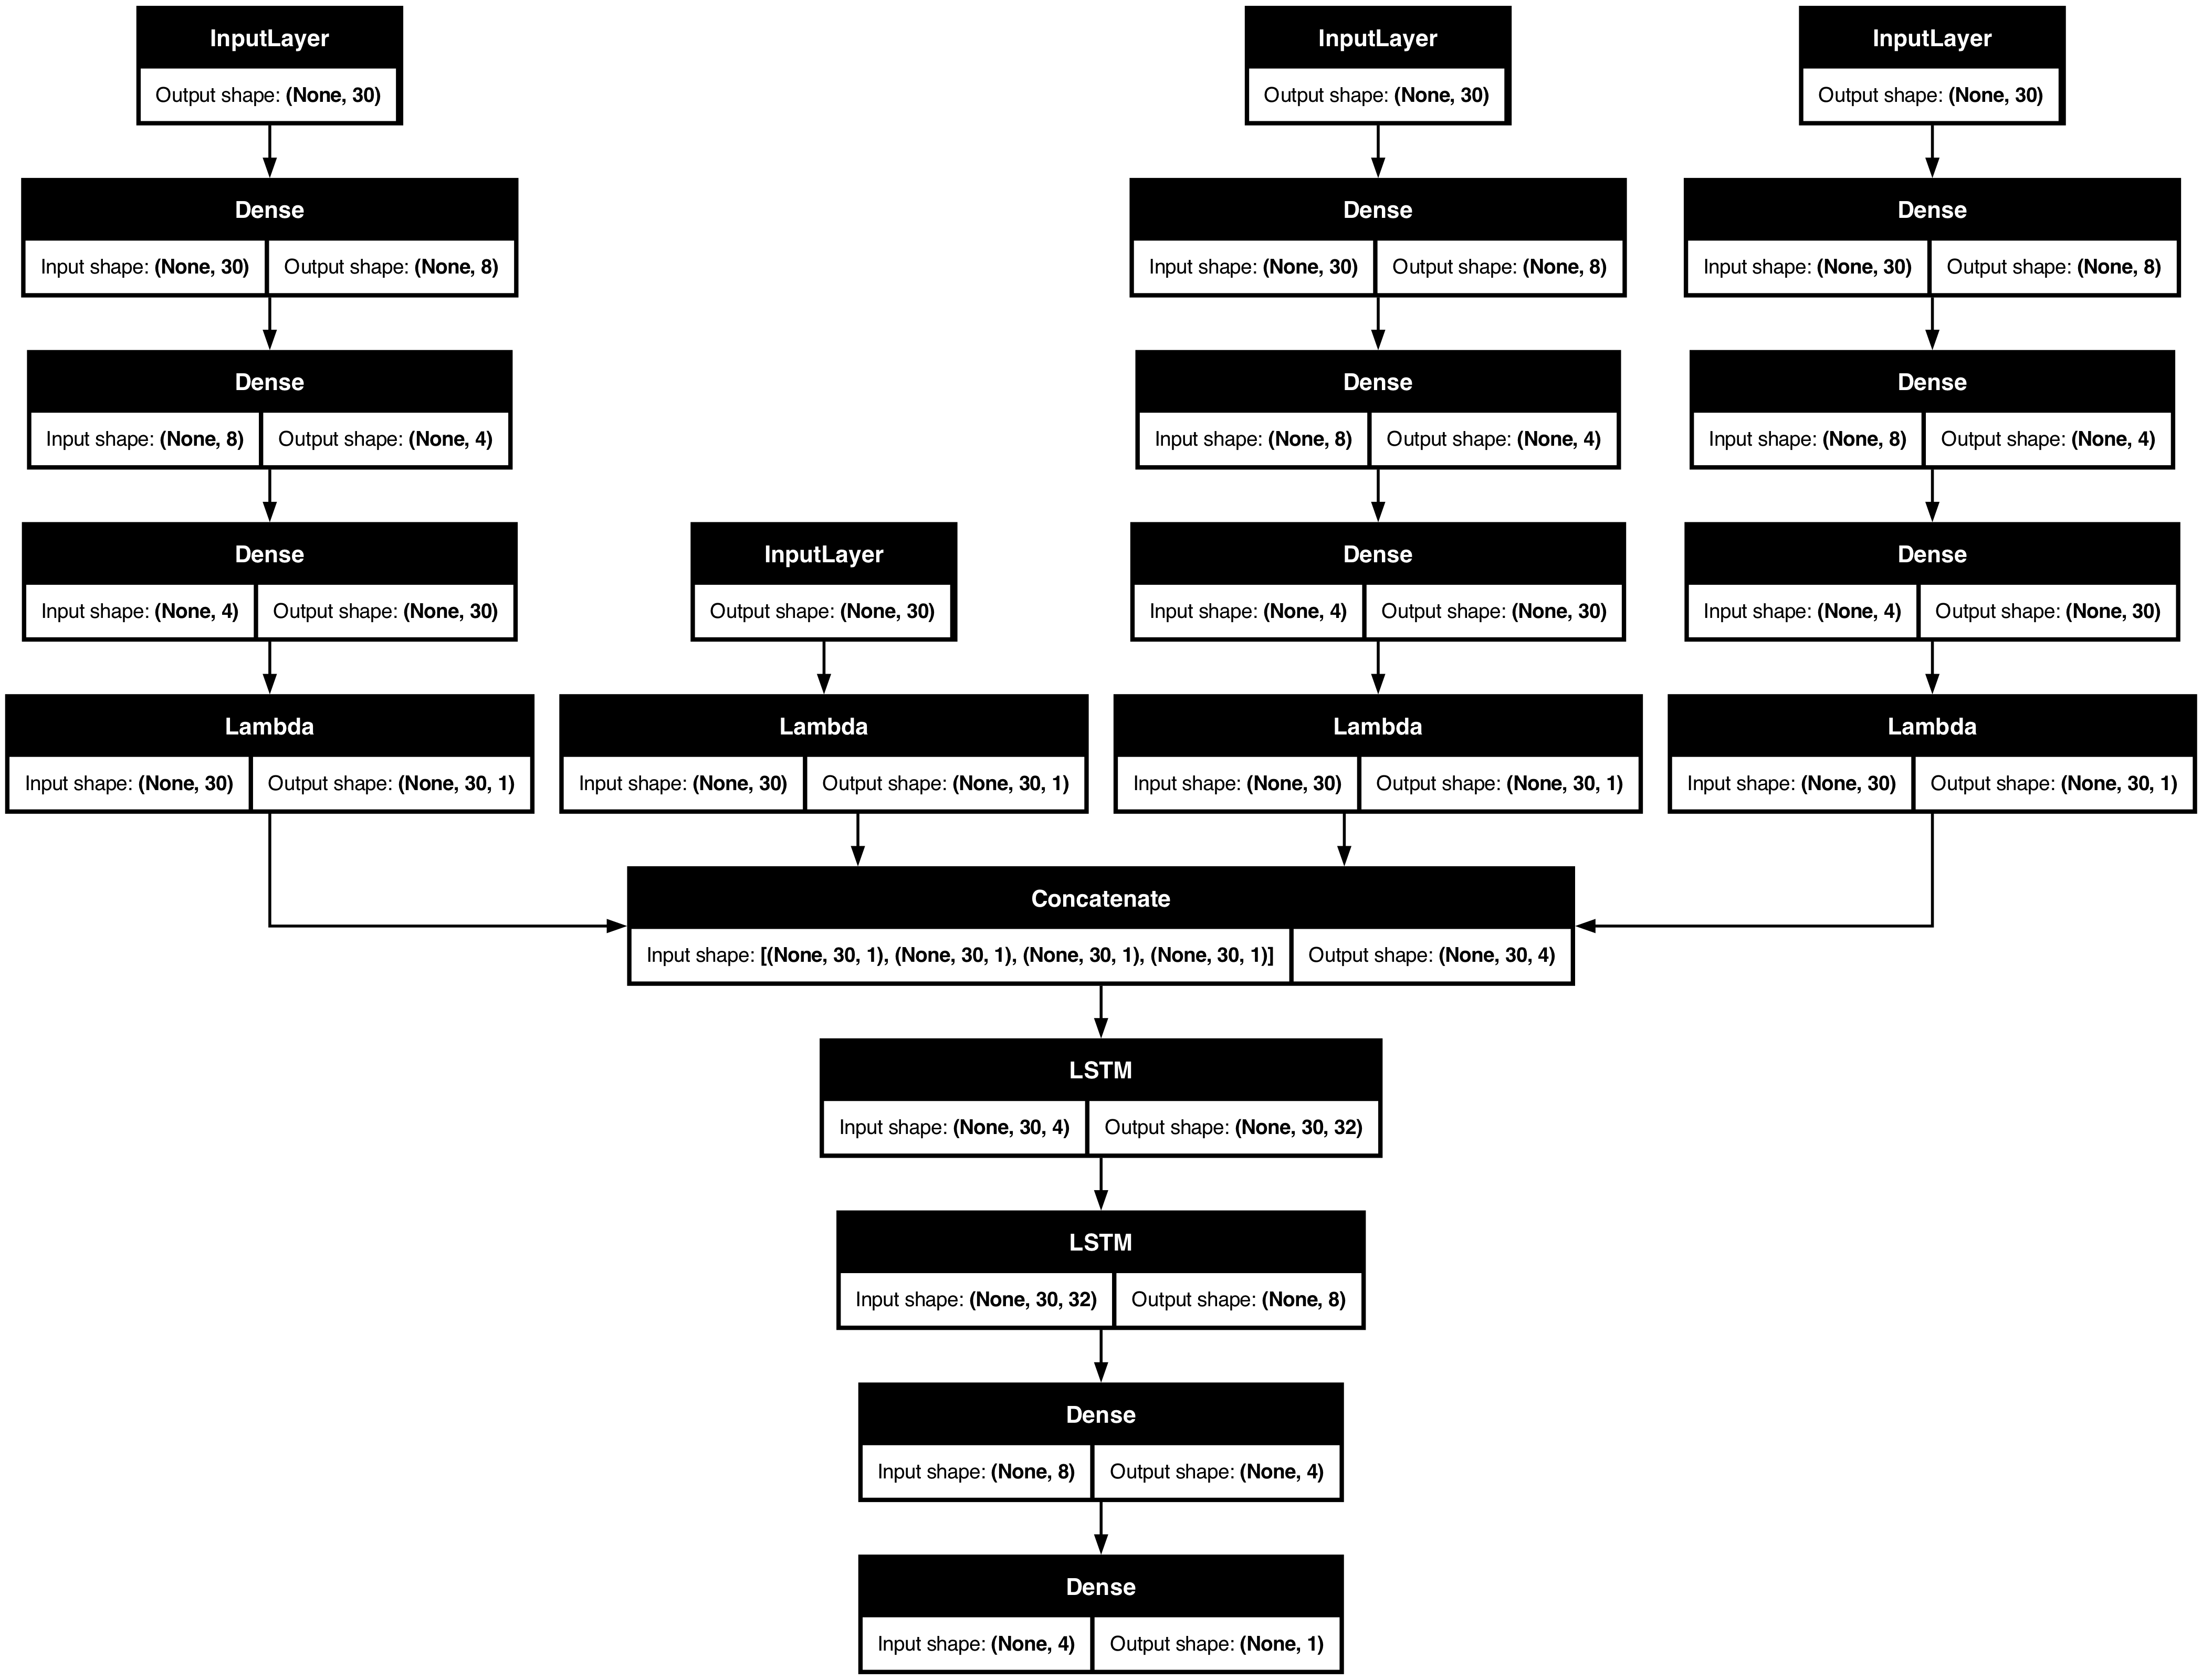

In [334]:
tf.keras.utils.plot_model(model,show_shapes=True,rankdir="TB",expand_nested=True)

In [335]:
k=int(len(n_h)*0.8)
timestep=30
tr_n_h=n_h[:k]
tr_n_l=n_l[:k]
tr_n_c=n_c[:k]
tr_n_o=n_o[:k]

Y_o=(((np.array(df["n_h"])[1:]-np.array(df["n_h"])[0:-1])>0))+0
Y_d=(((np.array(df["n_o"])-np.array(df["n_c"]))>0))+0

ytr_n_h=n_h[1:k+1]
ytr_n_l=n_l[1:k+1]
ytr_n_c=n_c[1:k+1]
ytr_n_o=Y_o[timestep-1:k+timestep-1]

te_n_h=n_h[k:-1]
te_n_l=n_l[k:-1]
te_n_c=n_c[k:-1]
te_n_o=n_o[k:-1]

yte_n_h=n_h[k+1:]
yte_n_l=n_l[k+1:]
yte_n_c=n_c[k+1:]
yte_n_o=Y_o[k+timestep-1:]

In [336]:
yte_n_o.shape

(498,)

In [337]:
tr_n_h.shape

(1993, 30)

In [338]:
model.compile(optimizer='adam',
              loss={'co': 'mse', 'lo': 'mse', 'ho': 'mse',"Yo":"binary_crossentropy"},
              loss_weights={'co': 0.2, 'lo': 0.2, 'ho': 0.2,"Yo":1.0},
              metrics={"Yo":"accuracy"})

In [342]:
model.fit(x=[tr_n_o,tr_n_c,tr_n_h,tr_n_l],y={"co": ytr_n_c, "lo": ytr_n_l, "ho": ytr_n_h, "Yo": ytr_n_o},
          validation_data=(
        [te_n_o, te_n_c, te_n_h, te_n_l], 
        {"co": yte_n_c, "lo": yte_n_l, "ho": yte_n_h, "Yo": yte_n_o} ),
          epochs=200)

Epoch 1/200
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - Yo_accuracy: 0.5549 - loss: 11.2681 - val_Yo_accuracy: 0.4779 - val_loss: 130.2824
Epoch 2/200
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - Yo_accuracy: 0.5468 - loss: 9.9344 - val_Yo_accuracy: 0.5040 - val_loss: 130.5028
Epoch 3/200
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - Yo_accuracy: 0.5621 - loss: 10.6797 - val_Yo_accuracy: 0.4699 - val_loss: 131.4860
Epoch 4/200
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - Yo_accuracy: 0.5525 - loss: 9.9045 - val_Yo_accuracy: 0.4699 - val_loss: 130.9286
Epoch 5/200
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - Yo_accuracy: 0.5411 - loss: 11.4372 - val_Yo_accuracy: 0.4739 - val_loss: 139.6323
Epoch 6/200
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - Yo_accuracy: 0.5267 - loss: 11.0867 - val_Yo_accuracy: 0.4940 - val_loss: 137.2157
Epoch 7/200
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - Yo_accuracy: 0.5348 - loss: 11.4491 - val_Yo_accuracy: 0.4940 - val_loss: 133.3218
Epoch 8/200
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step

In [233]:
m=tf.random.normal((2,3,2))

In [234]:
m

<tf.Tensor: shape=(2, 3, 2), dtype=float32, numpy=
array([[[ 1.1907895 , -1.5698978 ],
        [ 0.34972546, -0.07091642],
        [ 1.501759  ,  0.18376733]],

       [[ 0.28424683,  0.04761541],
        [ 2.1332881 ,  0.91175884],
        [-0.07811178, -0.13701205]]], dtype=float32)>

In [236]:
m2=tf.reshape(m, shape=(-1, 2))

In [237]:
tf.reshape(m2, shape=(2, 3, 2))

<tf.Tensor: shape=(2, 3, 2), dtype=float32, numpy=
array([[[ 1.1907895 , -1.5698978 ],
        [ 0.34972546, -0.07091642],
        [ 1.501759  ,  0.18376733]],

       [[ 0.28424683,  0.04761541],
        [ 2.1332881 ,  0.91175884],
        [-0.07811178, -0.13701205]]], dtype=float32)>

In [351]:
np.uint16(1.2)

1

In [441]:
import yfinance as yf

# ดึงข้อมูลหุ้นรายนาที
data = yf.download('NVDA', interval='1m', start='2024-10-24', end='2024-10-25')
print(data)


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['NVDA']: YFChartError('%ticker%: 1m data not available for startTime=1729742400 and endTime=1729828800. The requested range must be within the last 30 days.')


Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []


In [443]:
from alpha_vantage.timeseries import TimeSeries

# ใส่ API Key ที่ได้รับหลังจากสมัครสมาชิก
api_key = "K1W0NGJ8TRUTR7DN"

# กำหนด ticker ของหุ้นที่ต้องการดึง (ตัวอย่าง: AAPL สำหรับ Apple)
symbol = "AAPL"

# ดึงข้อมูลรายวัน
ts = TimeSeries(key=api_key, output_format="pandas")
data, meta_data = ts.get_intraday(symbol=symbol, interval="1min", outputsize="full")

# ดูตัวอย่างข้อมูล
print(data.head())


                     1. open  2. high   3. low  4. close  5. volume
date                                                               
2024-11-22 19:59:00  229.935   229.95  229.920   229.935      169.0
2024-11-22 19:58:00  229.940   229.95  229.912   229.925      127.0
2024-11-22 19:57:00  229.900   229.94  229.900   229.925       23.0
2024-11-22 19:56:00  229.930   229.95  229.900   229.920     1009.0
2024-11-22 19:55:00  229.925   229.95  229.900   229.920       49.0


In [445]:
data.head(20)


,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2024-11-22 19:59:00,229.935,229.9500,229.920,229.935,169.0
2024-11-22 19:58:00,229.940,229.9500,229.912,229.925,127.0
2024-11-22 19:57:00,229.900,229.9400,229.900,229.925,23.0
2024-11-22 19:56:00,229.930,229.9500,229.900,229.920,1009.0
2024-11-22 19:55:00,229.925,229.9500,229.900,229.920,49.0
2024-11-22 19:54:00,229.950,229.9500,229.900,229.930,73.0
2024-11-22 19:53:00,229.930,229.9900,229.900,229.990,548.0
2024-11-22 19:52:00,229.910,229.9350,229.910,229.935,11.0
2024-11-22 19:51:00,229.940,229.9400,229.900,229.920,27.0


In [381]:
data=pd.DataFrame(str(data.index))

ValueError: DataFrame constructor not properly called!

In [377]:

data.to_excel("AAPL.xlsx", index=True)



ValueError: Excel does not support datetimes with timezones. Please ensure that datetimes are timezone unaware before writing to Excel.

In [424]:
import yfinance as yf

ticker = "AAPL"
data = yf.download(ticker, interval="1m", period="1d")
print(data)


[*********************100%%**********************]  1 of 1 completed

                                 Open        High         Low       Close  \
Datetime                                                                    
2024-11-22 09:30:00-05:00  228.059998  229.220001  228.059998  228.731003   
2024-11-22 09:31:00-05:00  228.750000  228.889999  228.517700  228.759995   
2024-11-22 09:32:00-05:00  228.807602  229.149994  228.807602  229.001007   
2024-11-22 09:33:00-05:00  229.029907  229.086807  228.830002  228.970001   
2024-11-22 09:34:00-05:00  228.929993  229.018005  228.744995  228.779999   
...                               ...         ...         ...         ...   
2024-11-22 13:20:00-05:00  230.419998  230.419998  230.300095  230.320007   
2024-11-22 13:21:00-05:00  230.309998  230.369797  230.270004  230.339996   
2024-11-22 13:22:00-05:00  230.330002  230.350006  230.304993  230.339996   
2024-11-22 13:23:00-05:00  230.339996  230.399994  230.304993  230.399994   
2024-11-22 13:24:00-05:00  230.399994  230.408401  230.330002  230.354996   

In [409]:
tf.keras.utils.set_random_seed(7)

# ตัวอย่างโมเดล
model4 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(5,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [410]:
model4.layers[0].get_weights()[0]==model3.layers[0].get_weights()[0]

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True]])